## Preprocessing/Analysis


In [13]:
import pandas as pd

df = pd.read_csv('./EuCitiesTemperatures.csv')

country_avg_location = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

for country in country_avg_location.index:
    df.loc[(df['country'] == country) & (df['latitude'].isna()), 'latitude'] = country_avg_location.loc[country, 'latitude']
    df.loc[(df['country'] == country) & (df['longitude'].isna()), 'longitude'] = country_avg_location.loc[country, 'longitude']

print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91

In [14]:
filtered_cities = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]
city_count_per_country = filtered_cities['country'].value_counts()
max_cities = city_count_per_country.max()
countries_with_max_cities = city_count_per_country[city_count_per_country == max_cities].index.tolist()

print(countries_with_max_cities)

['Romania', 'Poland']


In [15]:
avg_temp_by_type = df.groupby(['EU', 'coastline'])['temperature'].mean()

def fill_missing_temperature(row):
    if pd.isna(row['temperature']):
        return avg_temp_by_type[row['EU'], row['coastline']]
    else:
        return row['temperature']

df['temperature'] = df.apply(fill_missing_temperature, axis=1)

print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08    15.180000  
1         1.52     7.481538  
2        11.41     4.540000  
3        14.02     6.910000

## Visualization

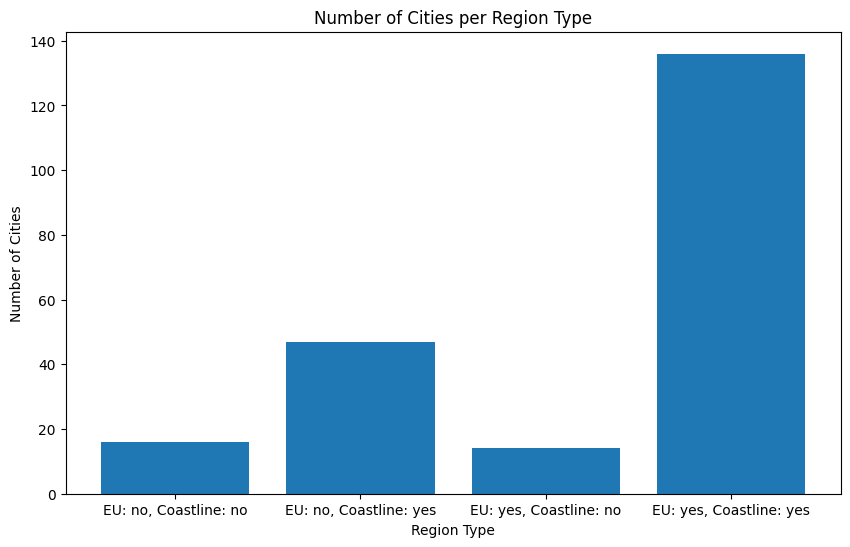

In [16]:
import matplotlib.pyplot as plt

region_city_count = df.groupby(['EU', 'coastline'])['city'].count()
labels = [f'EU: {eu}, Coastline: {coastline}' for eu, coastline in region_city_count.index]
values = region_city_count.values

plt.figure(figsize=(10, 6))
plt.bars = plt.bar(labels, values)
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.title('Number of Cities per Region Type')

plt.show()

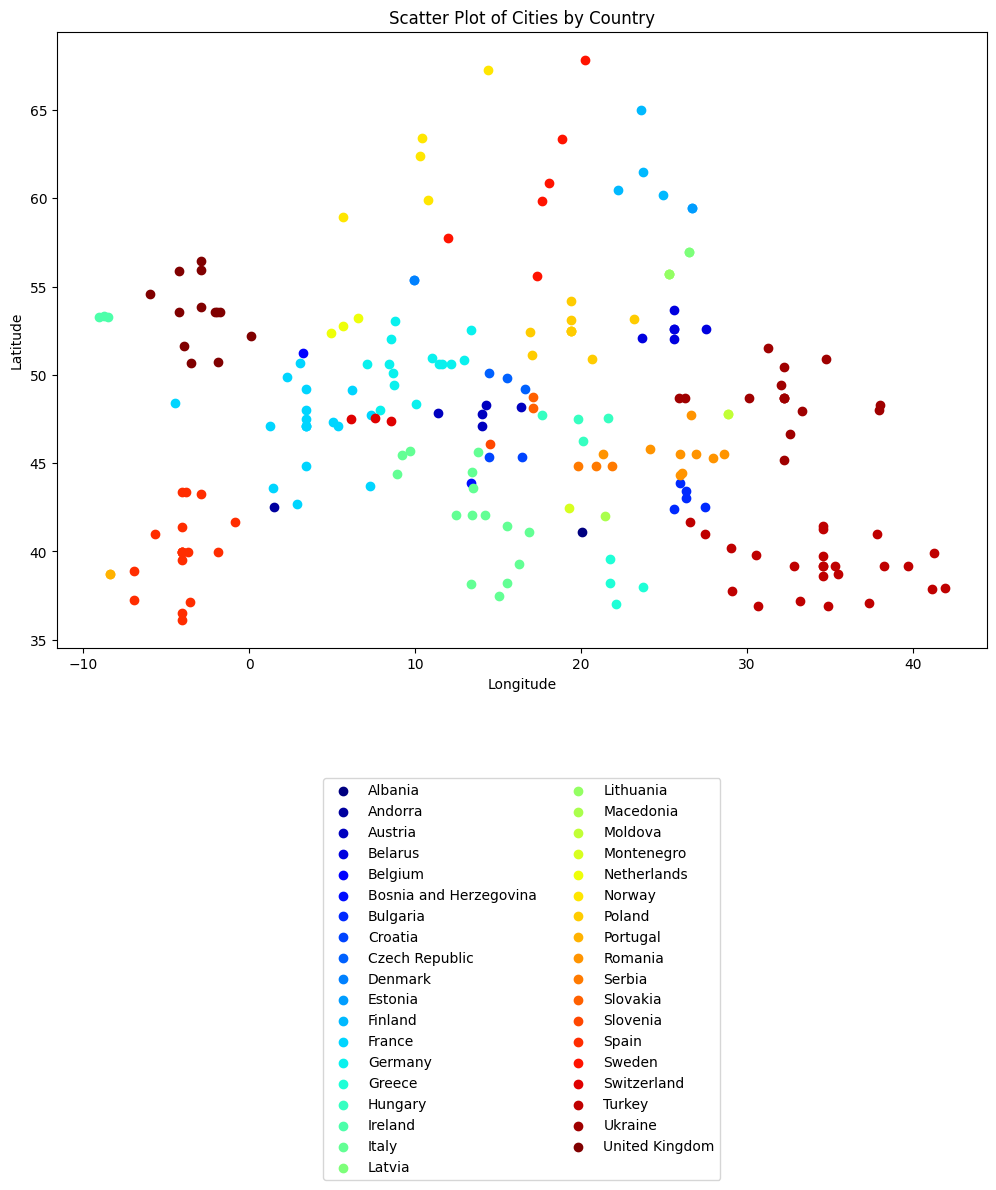

In [17]:
import matplotlib.pyplot as plt
import numpy as np

countries = df['country'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(countries))) #jet colormap array
country_to_color = dict(zip(countries, colors))

plt.figure(figsize=(12, 8))

for country in countries:
    country_data = df[df['country'] == country]
    #create a plot per country and use the corresponding color
    plt.scatter(country_data['longitude'], country_data['latitude'], color=country_to_color[country], label=country)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Cities by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2) #move legend to bottom of plot

plt.show()

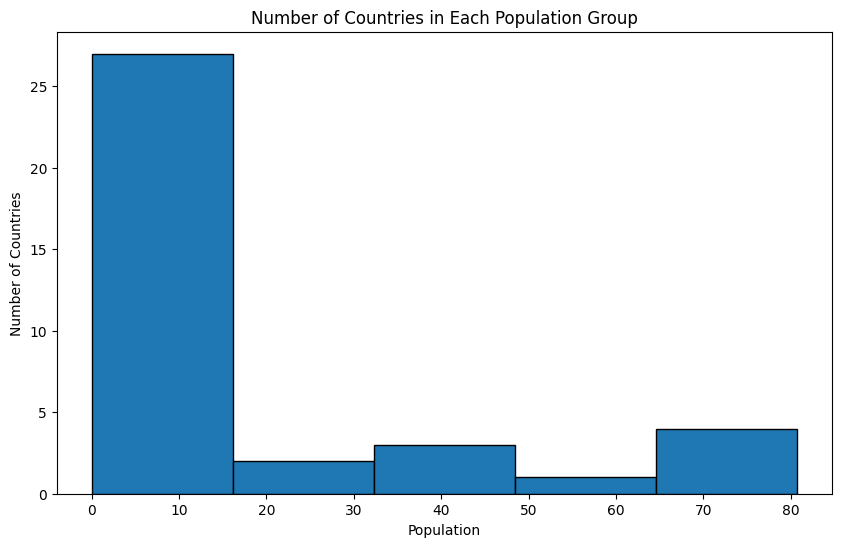

In [18]:
import matplotlib.pyplot as plt

unique_countries = df.drop_duplicates(subset='country')

plt.figure(figsize=(10, 6))
plt.hist(unique_countries['population'], bins=5, edgecolor='black')

plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Population Group')

plt.show()

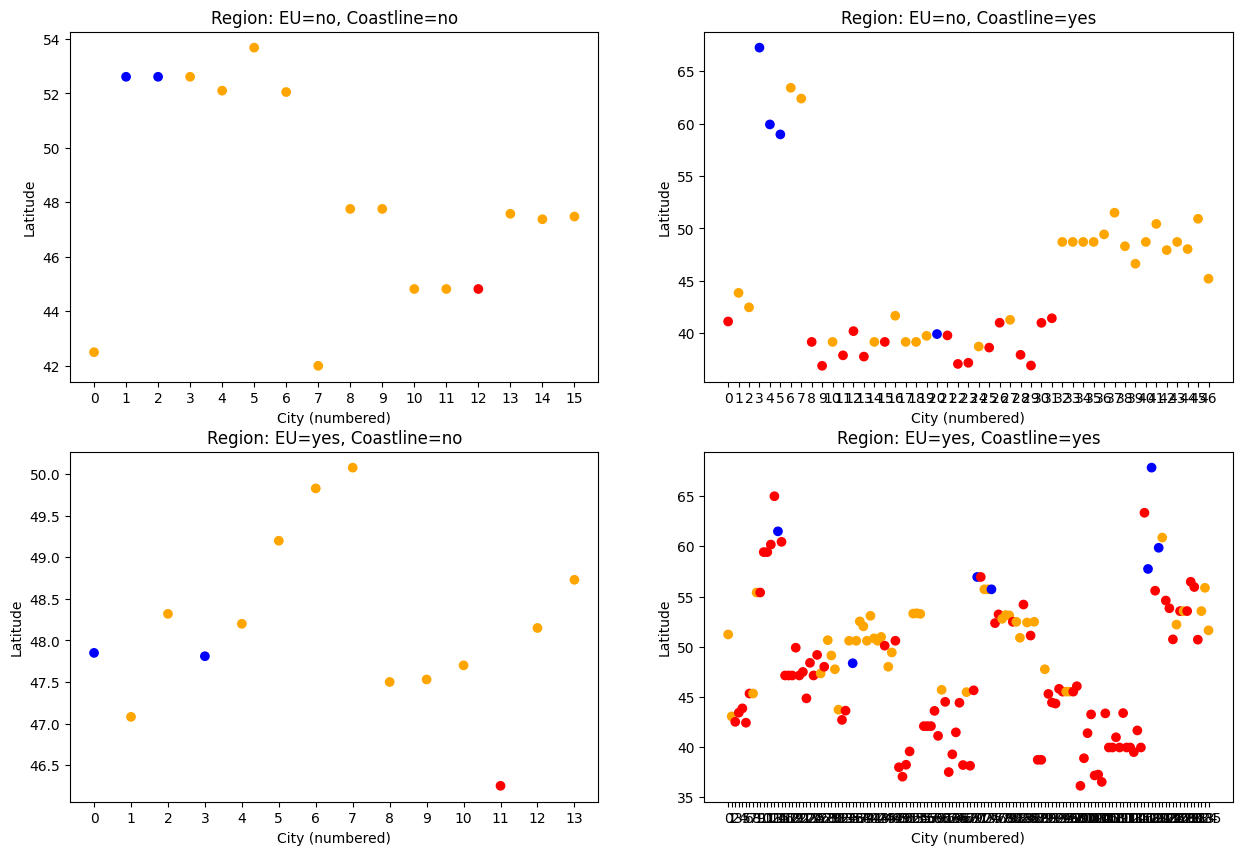

In [19]:
import matplotlib.pyplot as plt

region_types = df.groupby(['EU', 'coastline']).groups.keys() #assigns EU or Coastline vals to region_types
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten() #converts array of axes into 1D array

def color_based_on_temp(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

for i, region in enumerate(region_types): #to write each subplot individually
    region_data = df[(df['EU'] == region[0]) & (df['coastline'] == region[1])]
    cities = range(len(region_data))
    colors = region_data['temperature'].apply(color_based_on_temp)
    axes[i].scatter(cities, region_data['latitude'], color=colors)
    axes[i].set_xticks(cities)
    axes[i].set_xlabel('City (numbered)')
    axes[i].set_ylabel('Latitude')
    axes[i].set_title(f'Region: EU={region[0]}, Coastline={region[1]}')

plt.show()